In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle

In [23]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,5.969655e+17,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,5.758918e+17,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,5.952595e+17,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,5.723449e+17,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,5.681320e+17,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [24]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

## Default

In [25]:
SVM_default = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

In [26]:
# train classifier
print("training...")
SVM_default.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_default.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [27]:
SVM_metrics = {}
SVM_default_precision = precision_score(y_test, SVM_test_preds, average='macro')
SVM_default_recall = recall_score(y_test, SVM_test_preds, average='macro')
SVM_default_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_default_precision))
print('Recall: {:.3}'.format(SVM_default_recall))
print('Macro F1 Score: {:.3}'.format(SVM_default_macro_f1_score))

SVM_metrics['Default SVM'] = {'precision': SVM_default_precision, 'recall': SVM_default_recall, 
                              'macro_f1': SVM_default_macro_f1_score}

Model evaluation metrics
Precision: 0.741
Recall: 0.511
Macro F1 Score: 0.579


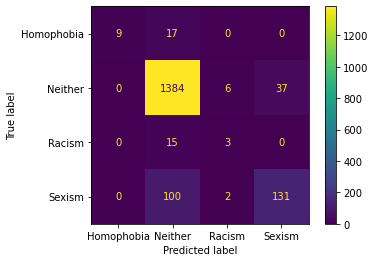

In [28]:
plot_confusion_matrix(SVM_default, count_test, y_test)

## Grid

In [29]:
SVM_default_grid = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid = GridSearchCV(SVM_default_grid, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid.fit(count_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.394, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.395, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.733, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.716, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.676, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.7

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.702, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.490, total=   2.2s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.437, total=   2.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.392, total=   2.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.405, total=   2.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.401, total=   2.5s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.616, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.543, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.596, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.506, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.561, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.646, total=   0.7s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.733, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.716, total=   0.8s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.731, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.702, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.406, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.403, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.390, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.394, total=   0.8s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.406, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.403, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.390, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.394, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.395, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.235, total=   0.8s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.516, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.465, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.467, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.733, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.716, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.676, total=   0.7s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.702, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.733, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.716, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.676, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.731, total=   0.8s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.728, total=   1.2s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.693, total=   1.1s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.684, total=   1.1s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.752, total=   1.2s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.633, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.406, total=   1.1s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.675, total=   2.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.635, total=   2.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.672, total=   2.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.706, total=   2.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.613, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.058, total=   4.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.775, total=   2.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.676, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.751, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.672, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.766, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.766, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.758, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.387, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.303, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.305, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.694, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.675, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.635, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.672, total=   1.8s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.058, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.735, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.774, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.676, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.751, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.672, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.766, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.758, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.701, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.731, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.684, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.717, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.694, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.675, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.635, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.672, total=   1.8s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   4.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.058, total=   4.3s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.676, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.751, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.672, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.766, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.758, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.712, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.752, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.683, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.753, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.659, total=   1.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.612, total=   1.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.621, total=   2.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.603, total=   1.9s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.672, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.728, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.666, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.726, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.679, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.318, total=   3.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.280, total=   3.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.304, total=   4.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.303, total=   3.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.696, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.686, total=   0.9s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.621, total=   2.1s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.603, total=   1.9s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.619, total=   1.8s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.674, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.724, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.699, total=   0.6s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.672, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.728, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.666, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.726, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.679, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.720, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.679, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.718, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.694, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   0.8s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.701, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.705, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.450, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.479, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.521, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.470, total=   0.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.672, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.728, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.666, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.726, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.679, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.734, total=   0.8s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.492, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.467, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.470, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.659, total=   1.9s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.612, total=   2.0s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.621, total=   2.0s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.728, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.666, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.726, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.679, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.674, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.726, total=   0.9s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.676, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.751, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.672, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.766, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.758, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.006, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.691, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.663, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.630, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.648, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.730, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.766, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.543, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.693, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.616, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.659, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.748, total=   1.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.753, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.700, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.755, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.755, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.676, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.761, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.691, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.676, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.733, total=   2.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.666, total=   2.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.735, total=   2.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.766, total=   3.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.691, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.6

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.742, total=   3.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.664, total=   3.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.730, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.766, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.126, total=   3.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.775, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.686, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.748, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.754, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.700, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.755, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.676, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.761, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.691, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.676, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.776, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.687, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.749, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.764, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.691, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.6

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.742, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.664, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.730, total=   3.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.766, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.006, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.738, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.640, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.681, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.463, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.700, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.722, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.677, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.691, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.613, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.715, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.689, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.660, total=   1.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.610, total=   1.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.617, total=   2.0s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.394, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.395, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.232, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.236, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.699, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.665, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.722, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.677, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.691, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.715, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.689, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.667, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.741, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.699, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.719, total=   0.9s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.617, total=   1.7s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.604, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.600, total=   1.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.638, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.681, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.684, total=   0.5s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.665, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.722, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.677, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.691, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.613, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.680, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.675, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.781, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.717, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.406, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.403, total=   0.8s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.736, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.709, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.232, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.236, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.665, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.722, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.677, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.691, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.613, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.711, total=   0.8s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.675, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.743, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.699, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.660, total=   1.6s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.610, total=   1.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.617, total=   1.7s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.770, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.669, total=   2.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.733, total=   2.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.666, total=   2.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.735, total=   2.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.772, total=   0.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.790, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.700, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.759, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.676, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.676, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.763, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.677, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.669, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.644, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.006, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.059, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.059, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.059, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.688, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.673, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.732, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.674, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.750, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.770, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.643, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.774, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.655, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.756, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.764, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.700, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.759, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.676, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.763, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.677, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.681, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.773, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.685, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.749, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.773, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.673, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.732, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.674, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.750, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.770, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.672, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.742, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.664, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.721, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.766, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.700, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.759, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.676, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.763, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.677, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.687, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.755, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.668, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.769, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.752, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 71.8min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [30]:
# train classifier
print("training...")
SVM_grid.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_grid.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [31]:
SVM_grid_precision = precision_score(y_test, SVM_test_preds, average='macro') 
SVM_grid_recall = recall_score(y_test, SVM_test_preds, average='macro')
SVM_grid_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_grid_precision))
print('Recall: {:.3}'.format(SVM_grid_recall))
print('Macro F1 Score: {:.3}'.format(SVM_grid_macro_f1_score))

SVM_metrics['Grid Search SVM'] = {'precision': SVM_grid_precision, 'recall': SVM_grid_recall, 
                                  'macro_f1': SVM_grid_macro_f1_score}

Model evaluation metrics
Precision: 0.666
Recall: 0.711
Macro F1 Score: 0.674


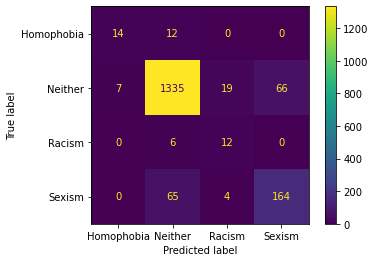

In [32]:
plot_confusion_matrix(SVM_grid.best_estimator_, count_test, y_test)

In [33]:
#compare parameters
results = pd.DataFrame.from_dict(SVM_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\SVM_count_results_multi.csv",
               index=True)
results

,precision,recall,macro_f1
Default SVM,0.741354,0.51123,0.578771
Grid Search SVM,0.666009,0.71113,0.673872


## Default SVM - no SL

In [34]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,5.969655e+17,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,5.758918e+17,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,5.952595e+17,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,5.723449e+17,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,5.681320e+17,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [35]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

In [36]:
SVM_default = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

In [37]:
# train classifier
print("training...")
SVM_default.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_default.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [38]:
SVM_default_precision = precision_score(y_test, SVM_test_preds, average='macro')
SVM_default_recall = recall_score(y_test, SVM_test_preds, average='macro')
SVM_default_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_default_precision))
print('Recall: {:.3}'.format(SVM_default_recall))
print('Macro F1 Score: {:.3}'.format(SVM_default_macro_f1_score))

SVM_metrics['Default SVM - no SL'] = {'precision': SVM_default_precision, 'recall': SVM_default_recall, 
                              'macro_f1': SVM_default_macro_f1_score}

Model evaluation metrics
Precision: 0.865
Recall: 0.45
Macro F1 Score: 0.517


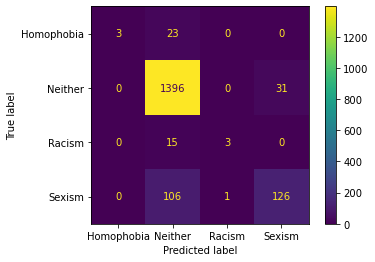

In [39]:
plot_confusion_matrix(SVM_default, count_test, y_test)

## Grid SVM - no SL

In [40]:
SVM_default_grid = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid = GridSearchCV(SVM_default_grid, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid.fit(count_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.394, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.395, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.692, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.650, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.6

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.678, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.492, total=   3.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.431, total=   3.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.350, total=   3.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.406, total=   3.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.379, total=   3.6s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.427, total=   3.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.411, total=   3.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.369, total=   3.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.382, total=   3.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.415, total=   3.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.604, total=   0.7s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.692, total=   1.1s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.650, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.678, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.406, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.403, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.390, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.394, total=   1.1s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.407, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.403, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.390, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.394, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.395, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.235, total=   1.1s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.383, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.375, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.370, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.692, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.650, total=   1.1s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.678, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.692, total=   1.1s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.650, total=   1.1s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.650, total=   1.1s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.686, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.602, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.641, total=   1.3s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.578, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.606, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.407, total=   1.3s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.583, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.516, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.520, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.525, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.504, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.058, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.769, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.654, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.707, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.458, total=   4.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.287, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.318, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.629, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.583, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.516, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.520, total=   3.3s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   4.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.058, total=   4.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.641, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.729, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.654, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.707, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.674, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.628, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.617, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.626, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.629, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.583, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.516, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.520, total=   3.3s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   4.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.058, total=   5.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   5.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   5.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.738, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.654, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.707, total=   1.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.699, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.656, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.641, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.618, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.588, total=   3.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.498, total=   3.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.509, total=   3.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.441, total=   3.3s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.713, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.722, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.645, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.621, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.632, total=   1.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.309, total=   4.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.323, total=   5.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.351, total=   5.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.343, total=   4.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.646, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.640, total=   1.3s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.509, total=   3.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.441, total=   3.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.458, total=   3.1s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.584, total=   0.5s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.481, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.518, total=   0.5s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.713, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.722, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.645, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.621, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.632, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.642, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.650, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.630, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.670, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.1s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.608, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.658, total=   1.3s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.415, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.442, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.433, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.397, total=   1.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.713, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.722, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.645, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.621, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.632, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.737, total=   1.1s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.390, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.394, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.397, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.588, total=   3.2s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.498, total=   3.2s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.509, total=   3.4s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.722, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.645, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.621, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.632, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.720, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.668, total=   1.1s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.738, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.738, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.654, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.695, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.707, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.006, total=   4.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.591, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.563, total=   3.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.512, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.517, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.613, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.672, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.703, total=   4.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.563, total=   4.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.582, total=   4.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.670, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.635, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.781, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.736, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.740, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.740, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.645, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.686, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.674, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.738, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.734, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.629, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.625, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.729, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.591, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.5

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.741, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.582, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.613, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.672, total=   4.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.112, total=   4.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.728, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.661, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.618, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.749, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.736, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.740, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.645, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.686, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.674, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.738, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.736, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.661, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.603, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.742, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.591, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.5

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.741, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.582, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.613, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.672, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.006, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.382, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.552, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.590, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.559, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.736, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.719, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.645, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.604, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.580, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.753, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.680, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.588, total=   3.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.496, total=   3.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.509, total=   3.5s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.394, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.395, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.232, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.236, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.693, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.698, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.719, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.645, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.604, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.753, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.680, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.655, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.654, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.675, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.726, total=   1.3s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.509, total=   3.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.441, total=   3.4s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.457, total=   3.1s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.611, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.437, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.513, total=   0.5s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.698, total=   0.9s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.719, total=   1.0s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.645, total=   1.0s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.604, total=   1.0s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.580, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.655, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.672, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.617, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.669, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.407, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.403, total=   1.2s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.638, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.646, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.232, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.236, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.698, total=   0.9s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.719, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.645, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.604, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.580, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.737, total=   1.3s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.652, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.645, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.676, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.588, total=   3.2s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.496, total=   3.2s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.509, total=   3.5s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.754, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.716, total=   3.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.734, total=   3.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.629, total=   3.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.625, total=   3.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.678, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.771, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.737, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.738, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.644, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.644, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.678, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.631, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.641, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.597, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.006, total=   4.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.059, total=   4.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.059, total=   4.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.059, total=   4.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.592, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.710, total=   3.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.717, total=   3.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.666, total=   3.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.653, total=   2.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.754, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.695, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.739, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.669, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.659, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.780, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.737, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.738, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.644, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.678, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.631, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.701, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.719, total=   2.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.659, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.647, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.758, total=   2.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.710, total=   3.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.717, total=   3.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.666, total=   3.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.653, total=   2.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.754, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.722, total=   4.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.740, total=   4.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.598, total=   4.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.612, total=   4.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.688, total=   4.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.737, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.738, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.644, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.678, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.631, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.740, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.752, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.660, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.692, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.691, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 101.6min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [41]:
# train classifier
print("training...")
SVM_grid.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_grid.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [42]:
SVM_grid_precision = precision_score(y_test, SVM_test_preds, average='macro') 
SVM_grid_recall = recall_score(y_test, SVM_test_preds, average='macro')
SVM_grid_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_grid_precision))
print('Recall: {:.3}'.format(SVM_grid_recall))
print('Macro F1 Score: {:.3}'.format(SVM_grid_macro_f1_score))

SVM_metrics['Grid Search SVM - no SL'] = {'precision': SVM_grid_precision, 'recall': SVM_grid_recall, 
                                  'macro_f1': SVM_grid_macro_f1_score}

Model evaluation metrics
Precision: 0.71
Recall: 0.666
Macro F1 Score: 0.65


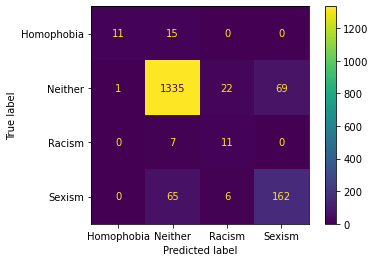

In [43]:
plot_confusion_matrix(SVM_grid.best_estimator_, count_test, y_test)

In [44]:
#compare parameters
results = pd.DataFrame.from_dict(SVM_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\SVM_count_results_multi.csv",
               index=True)
results

,precision,recall,macro_f1
Default SVM,0.741354,0.511230,0.578771
Grid Search SVM,0.666009,0.711130,0.673872
Default SVM - no SL,0.864760,0.450275,0.516699
Grid Search SVM - no SL,0.709709,0.666249,0.650090
